## Read in data

In [3]:
from __future__ import absolute_import, division, print_function

import numpy
import os
import pandas
from pandas import DataFrame

wd = os.getcwd()
os.chdir('/Users/travisgreenwald/downloads/')
df = pandas.read_excel('JSS_RawArrests.xlsx')
df = DataFrame(df)

df.head()

,ID,AB_RT,AB_RIN,ARREST_TYPE,Arrest_RIN,ArrestPrimaryKey,ARREST_OFFICER1,ORGANIZATION,CURRENT_STATUS,RECORDS_AR_COURT_A,...,STATE,ZIP,DOB,YOB,RACE,ALIAS,X_COORDINATE,Y_COORDINATE,DISTRICT,ZONE
0,1,AB,342729,DS,342729,201439059,P13102,D6,C,S,...,CO,80246,1977-09-12,1977.0,W,N,3158233.0,1695635.0,3,322
1,2,AB,342729,DS,342729,201439059,P13102,D6,C,S,...,CO,80246,1977-09-12,1977.0,W,N,3158233.0,1695635.0,3,322
2,3,AB,342729,DS,342729,201439059,P13102,D6,C,S,...,CO,80246,1977-09-12,1977.0,W,N,3158233.0,1695635.0,3,322
3,4,AB,342739,DS,342739,201439064,P79020,JUV,A,T,...,CO,80204-,1999-03-31,1999.0,W,N,3125626.0,1691808.0,UI,UI
4,5,AB,252007,DS,252007,201314,P07046,P41,A,T,...,CO,80219,1996-01-22,1996.0,W,N,3128789.0,1669002.0,4,421


In [4]:
arrests = df.drop_duplicates(subset=['ArrestPrimaryKey','PIN'])
timesArrested = pandas.DataFrame({'PIN': arrests['PIN'].value_counts().index,
                             'Times_Arrested': arrests['PIN'].value_counts().values})
unqPeople = df.drop_duplicates(subset='PIN')
personNumArrests = unqPeople.merge(timesArrested,on='PIN')
repArrestees = personNumArrests[personNumArrests['Times_Arrested']>1]
singleArrestees = personNumArrests[personNumArrests['Times_Arrested']==1]




#All multiple arrested 
dfMultiple = DataFrame(repArrestees)

#All single time arrested
dfSingle = DataFrame(singleArrestees)

## Top dates arrested, single vs multiple

### Single

In [5]:
dateSliceS = dfSingle['ARREST_DATE']
dateSliceS = pandas.to_datetime(dateSliceS)
grpDateS = dfSingle.groupby('ARREST_DATE')
dailyCountS = grpDateS['ID'].count()
dailyCountS = dailyCountS.sort_values(ascending=False)
dailyCountS = DataFrame(dailyCountS)
dailyCountS[:10]

,ID
ARREST_DATE,
2015-04-19,143
2015-09-19,91
2015-07-15,88
2015-04-18,88
2014-08-27,85
2015-09-24,81
2015-04-20,78
2014-02-22,77
2016-02-25,75


### Multiple

In [6]:
dateSliceM = dfMultiple['ARREST_DATE']
dateSliceM = pandas.to_datetime(dateSliceM)
grpDateM = dfMultiple.groupby('ARREST_DATE')
dailyCountM = grpDateM['ID'].count()
dailyCountM = dailyCountM.sort_values(ascending=False)
dailyCountM = DataFrame(dailyCountM)
dailyCountM[:10]

,ID
ARREST_DATE,
2013-07-24,49
2013-08-13,45
2013-06-11,45
2013-06-26,43
2013-09-18,43
2013-08-29,42
2013-06-20,41
2013-06-17,41
2013-08-14,40


### Time Series, single vs multiple

### Single

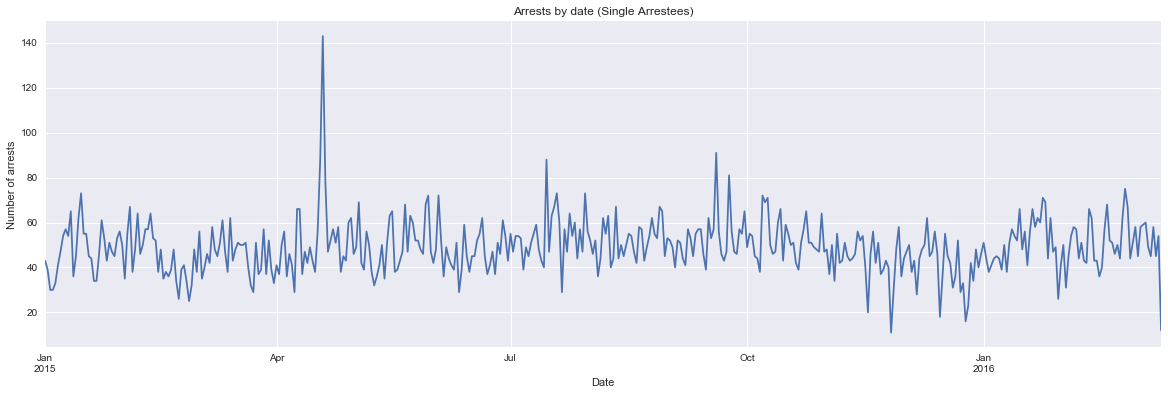

In [32]:
%matplotlib inline
import matplotlib.pyplot as plt
dailyCountS = grpDateS['ID'].count()
dailyCountS = dailyCountS['2015-1-1':]
dailyCountS.plot(figsize = (20,6))
plt.xlabel('Date')
plt.ylabel('Number of arrests')
plt.title('Arrests by date (Single Arrestees)')

### Multiple

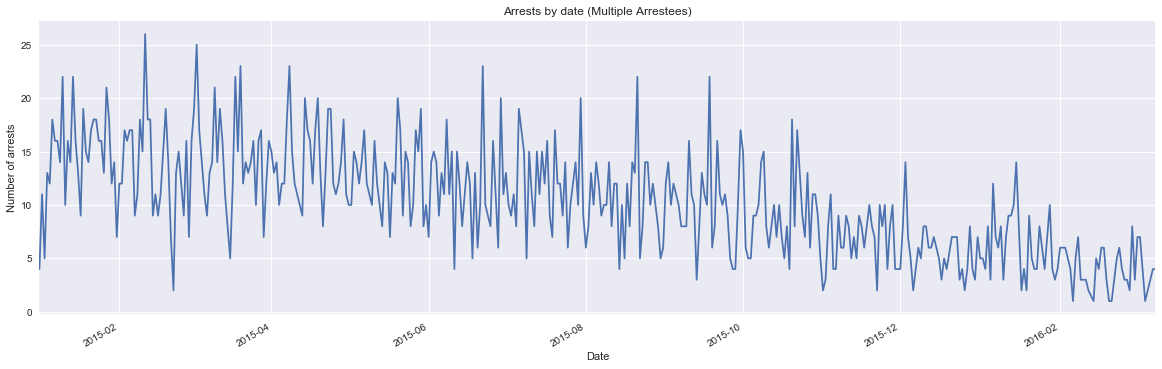

In [20]:
import matplotlib.pyplot as plt
dailyCountM = grpDateM['ID'].count()
dailyCountM = dailyCountM['2015-1-1':]
dailyCountM.plot(figsize = (20,6))
plt.xlabel('Date')
plt.ylabel('Number of arrests')
plt.title('Arrests by date (Multiple Arrestees)')

## Predict Date, single vs multiple

### Single

In [ ]:
from scipy import stats  
from statsmodels.formula.api import ols

model2 = ols("ARREST_DATE ~ CITY + SEX + DOB ",data=dfSingle).fit()
print(model2.summary()) # Print the results

modelSingle = model2
intercept = round(modelSingle.params[0],2)
y=df['ARREST_DATE']
yvar = 'Date'
x1var = 'City'
x1coef = round(modelSingle.params[1],2)
x2var = 'Gender'
x2coef = round(modelSingle.params[2],2)
x3var = 'Date of birth'
x3coef = round(modelSingle.params[3],2)
r2adj = round(modelSingle.rsquared_adj,2) #use for multiple regression
p_val = round(modelSingle.f_pvalue,4)

### Mutliple

## Top single arrest cities

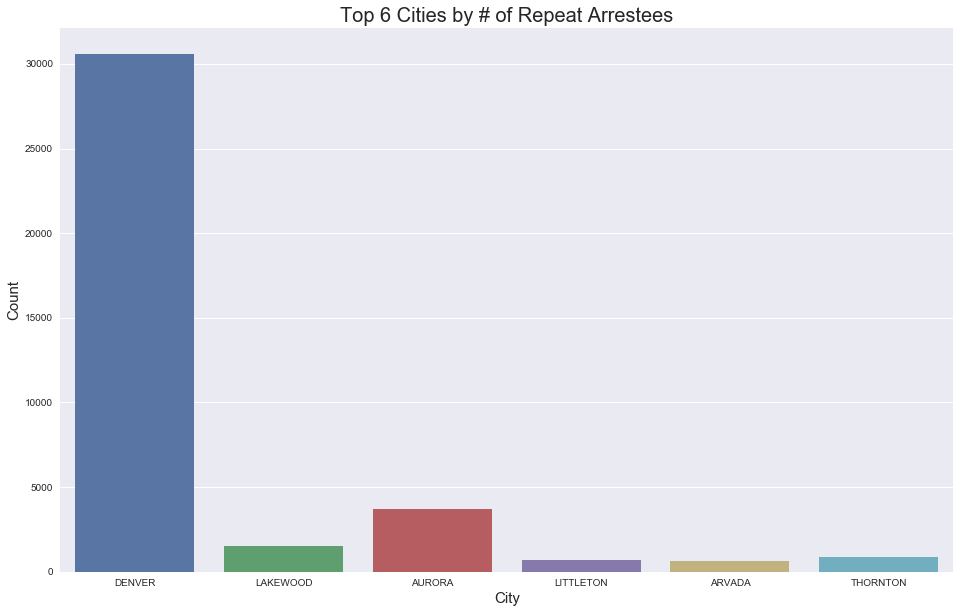

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
topSingleArrCities = dfSingle['CITY'].value_counts().head(6)
plt.figure(figsize=(16,10))
sns.countplot(dfSingle[dfSingle['CITY'].isin(topSingleArrCities.index)]['CITY'])
plt.title('Top 6 Cities by # of Single Arrestees',size=20)
plt.xlabel('City',fontsize=15)
plt.ylabel('Count',fontsize=15)

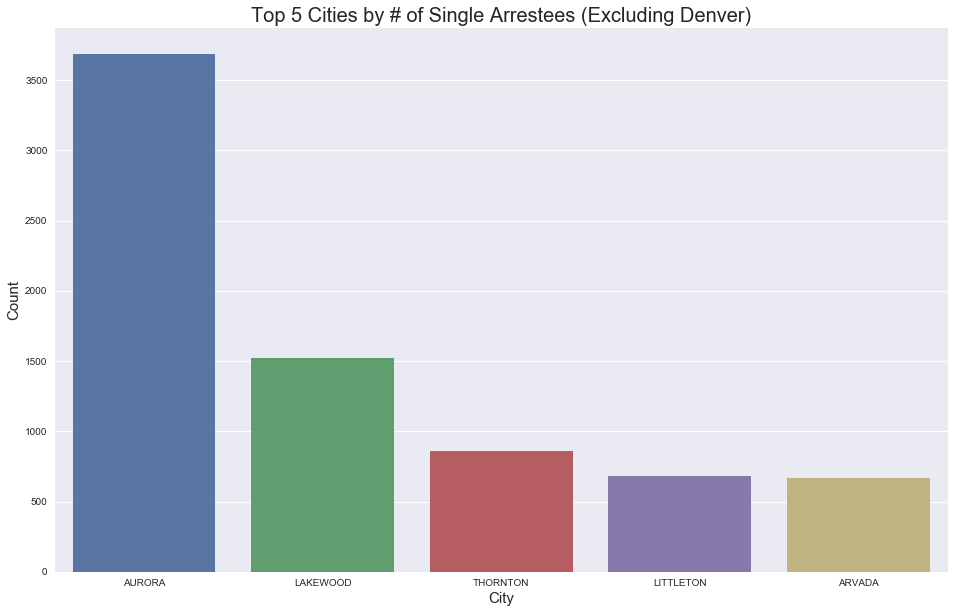

In [31]:
topCititesSingleDen = ['AURORA','LITTLETON','LAKEWOOD','THORNTON','ARVADA']
plt.figure(figsize=(16,10))
sns.countplot(dfSingle[dfSingle['CITY'].isin(topCititesSingleDen)]['CITY'], order = ['AURORA', 'LAKEWOOD', 'THORNTON', 'LITTLETON', 'ARVADA'])
plt.title('Top 5 Cities by # of Single Arrestees (Excluding Denver)',size=20)
plt.xlabel('City',fontsize=15)
plt.ylabel('Count',fontsize=15)